In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# --------------------------------------------
# Step 1: Dataset ko load aur clean karna
# --------------------------------------------
df = pd.read_csv("AirQuality.csv", sep=';', skipinitialspace=True)

In [3]:
# Unwanted columns ko remove karo
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

In [4]:
# NaN values ko handle karne ke liye (optional step)
df = df.dropna()

In [5]:
# Seaborn ka clean style set karo
sns.set(style="whitegrid")

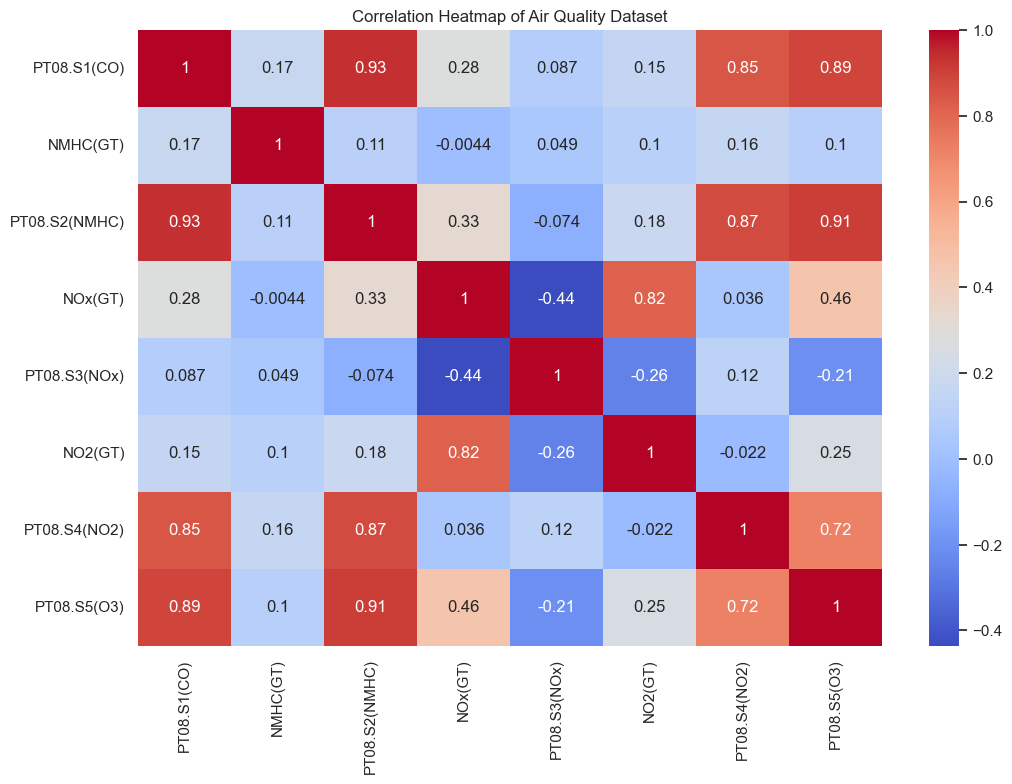

In [6]:
# --------------------------------------------
# 1. Correlation Heatmap
# --------------------------------------------
# Har numeric feature ke beech correlation dikhata hai
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Air Quality Dataset")
plt.show()

In [ ]:
# 🔍 Explanation:
# Ye heatmap batata hai kaunsa pollutant ya feature doosre se kitna related hai.
# Jaise agar 'CO(GT)' aur 'PT08.S1(CO)' ka correlation high hai,
# to CO gas ko woh sensor accurately measure kar raha hai

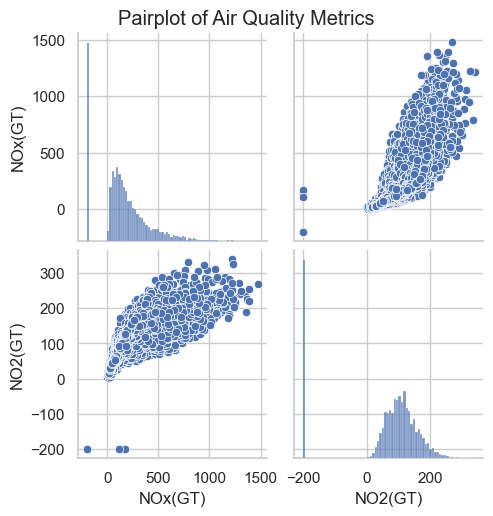

In [7]:
# --------------------------------------------
# 2. Pairplot (Multivariable Scatter Plots)
# --------------------------------------------
# Sab important gases aur humidity/temperature ke bich ka relation dikhata hai
selected_cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']
sns.pairplot(df[selected_cols])
plt.suptitle("Pairplot of Air Quality Metrics", y=1.02)
plt.show()

In [ ]:
# 🔍 Explanation:
# Har variable ke against har doosre ka scatter plot banta hai.
# Agar 'CO(GT)' vs 'T' me downward slope dikh raha hai,
# to CO levels temperature ke badhne se kam ho sakte hain

In [9]:
# Convert all columns to numeric, ignore errors
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

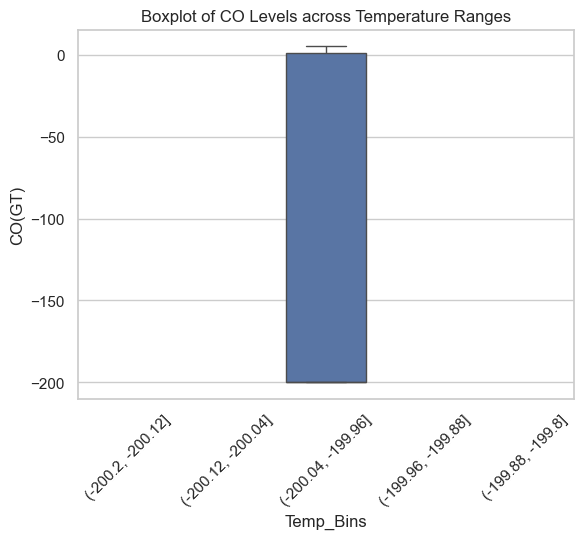

In [10]:
# 3. Boxplot: CO levels by Temperature Ranges
# --------------------------------------------
# Temperature ranges banakar CO ke distribution ko dikhate hain
df['Temp_Bins'] = pd.cut(df['T'], bins=5)
sns.boxplot(x='Temp_Bins', y='CO(GT)', data=df)
plt.title("Boxplot of CO Levels across Temperature Ranges")
plt.xticks(rotation=45)
plt.show()

# 🔍 Explanation:
# Agar kisi temperature bin me CO ka median zyada hai,
# to us temperature range me pollution zyada ho sakta hai.

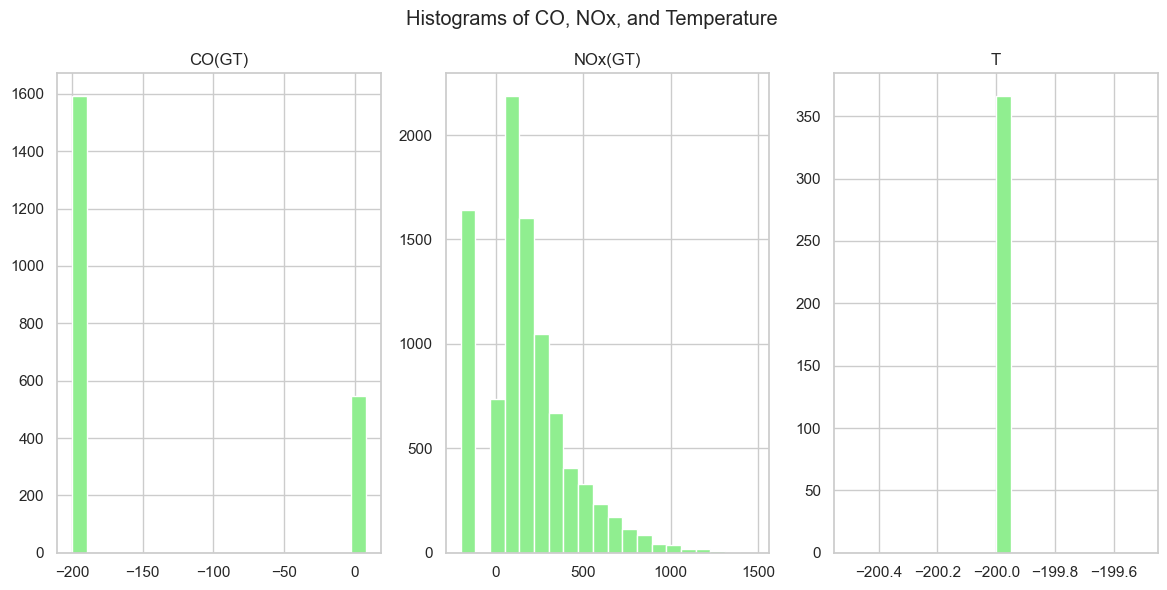

In [11]:
# --------------------------------------------
# 4. Histograms (Distribution of Features)
# --------------------------------------------
# CO, NOx, and Temperature ka frequency distribution
df[['CO(GT)', 'NOx(GT)', 'T']].hist(bins=20, figsize=(12, 6), layout=(1, 3), color='lightgreen')
plt.suptitle("Histograms of CO, NOx, and Temperature")
plt.tight_layout()
plt.show()

# 🔍 Explanation:
# Ye batata hai kis range me CO ya NOx values mostly aa rahi hain.
# Jaise agar CO ka peak 1.5 pe hai, to most observations waha hain.

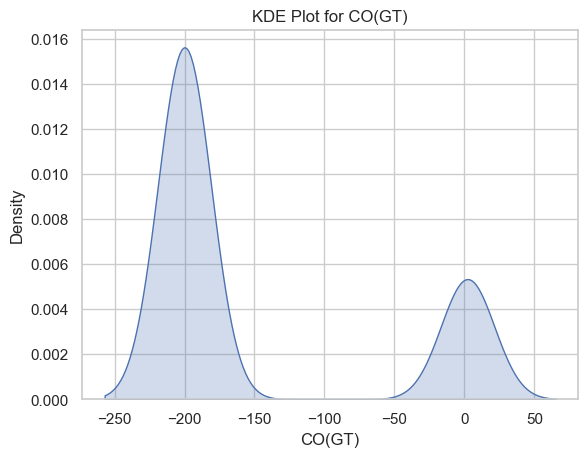

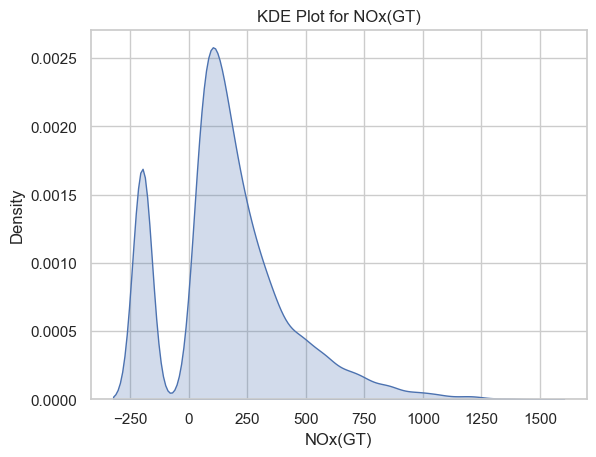

C:\Users\Admin\AppData\Local\Temp\ipykernel_23296\4246258294.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[col], fill=True)


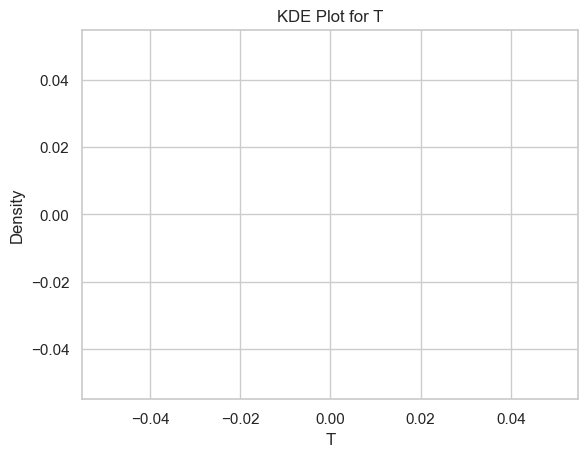

In [12]:
# --------------------------------------------
# 5. KDE Plots (Density Curves)
# --------------------------------------------
# Smooth curve se distribution ko samajhna
for col in ['CO(GT)', 'NOx(GT)', 'T']:
    sns.kdeplot(data=df[col], fill=True)
    plt.title(f"KDE Plot for {col}")
    plt.xlabel(col)
    plt.show()

# 🔍 Explanation:
# KDE plot dikhata hai data kis value ke around concentrate hai.
# e.g., CO(GT) mostly 1.5 ke aas paas peak karega, to wahi common value hai.


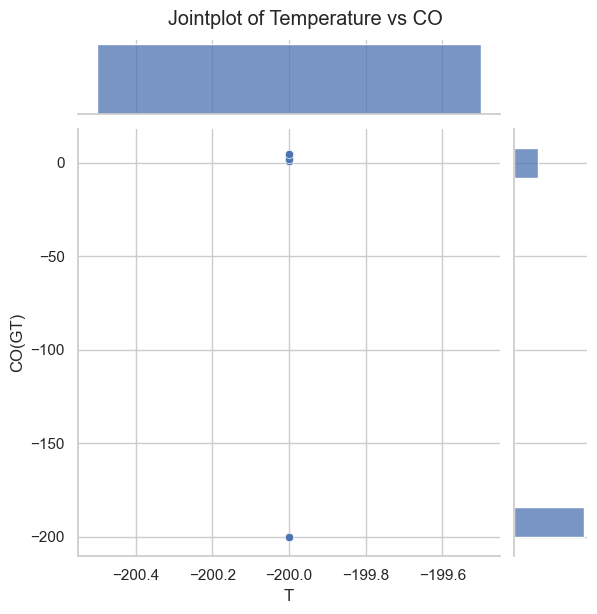

In [13]:
# --------------------------------------------
# 6. Jointplot: Temperature vs CO
# --------------------------------------------
# 2 variables ka combined relation
sns.jointplot(data=df, x='T', y='CO(GT)', kind='scatter')
plt.suptitle("Jointplot of Temperature vs CO", y=1.02)
plt.show()

# 🔍 Explanation:
# Agar scatterplot downward trend dikhaye,
# to jaise-jaise temperature badh raha hai, CO levels ghat rahe hain.
# Iska matlab ho sakta hai high temp pe CO kam hota hai.